In [17]:
pip install scikit-learn==1.3.0

  Using cached scikit_learn-1.3.0-cp312-cp312-win_amd64.whl
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3ee070ffb2825841e0dc119be22f0840b2b35cb/threadpoolctl-3.4.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("predictive_maintenance.csv")

In [11]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [13]:
df['Type'].nunique()

3

In [14]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#Some Understandings : <br>
1. First we need to transform some columns by ordinal encoding/ label encoding<br>
2. There are no missing values<br>
3. `Type` Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here<br>
The target variable here is `Target` only, i.e. to predict failure or not
4. Notice that, there are two output target variables `Target` and `Failure Type`<br> So prediect here multiclass Failure Type Variable<br>

5. This is a classification problem <br>

In [18]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [19]:
X = df.iloc[:,2:8]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
y_train.shape

(8000,)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
oe.fit(X_train[['Type']])
X_train['Type'] = oe.transform(X_train[['Type']]).astype(int)
X_test['Type'] = oe.transform(X_test[['Type']]).astype(int)

In [21]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9254,0,298.3,309.1,1616,31.1,195
1561,0,298.2,308.4,1388,53.8,137
1670,0,298.2,307.8,1528,31.1,194
6087,1,300.9,310.8,1599,33.0,7
6669,0,301.4,310.5,1571,33.9,208


In [22]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 98.22 %
Model Accuracy Score : 97.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.57      0.27      0.36        15
           2       0.83      0.75      0.79        20
           3       0.80      0.62      0.70        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.53      0.44      0.47      2000
weighted avg       0.97      0.98      0.97      2000

--------------------------------------------------------


e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1935
           1       0.87      0.87      0.87        15
           2       0.71      0.85      0.77        20
           3       0.50      0.62      0.55        13
           4       0.09      0.09      0.09        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.53      0.57      0.54      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.85      0.73      0.79        15
           2       0.83      0.75      0.79        20
           3       1.00      0.62      0.76        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.61      0.52      0.55      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.58 %
Model Accuracy Score : 96.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        15
           2       0.75      0.15      0.25        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Predictive Maintenance\predictive\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Random Forest is having 99.99% acc and 98% prec.

In [27]:
import pickle
pickle.dump(random_forest,open('model2.pkl','wb'))

In [28]:
import joblib
# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'model2.joblib')

['model2.joblib']

In [29]:
columns = df.columns.tolist()
columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

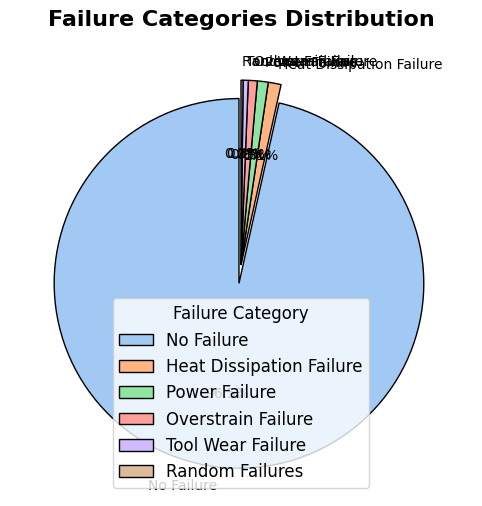

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
csv_file = "predictive_maintenance.csv"  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the failure categories are in the 'Failure Type' column
failure_categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']

# Count the occurrences of each failure category
failure_counts = data['Failure Type'].value_counts()

# Set custom colors for the pie chart slices
colors = sns.color_palette('pastel')

# Explode the 'No Failure' slice to emphasize it
explode = [0.1 if category == 'No Failure' else 0 for category in failure_categories]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(failure_counts, labels=failure_categories, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})

# Set the title for the chart
plt.title('Failure Categories Distribution', fontsize=16, fontweight='bold')

# Increase font size for better visibility
plt.rcParams.update({'font.size': 12})

# Add legend with category names and their corresponding counts
plt.legend(failure_counts.index, title='Failure Category', loc='best')

plt.show()


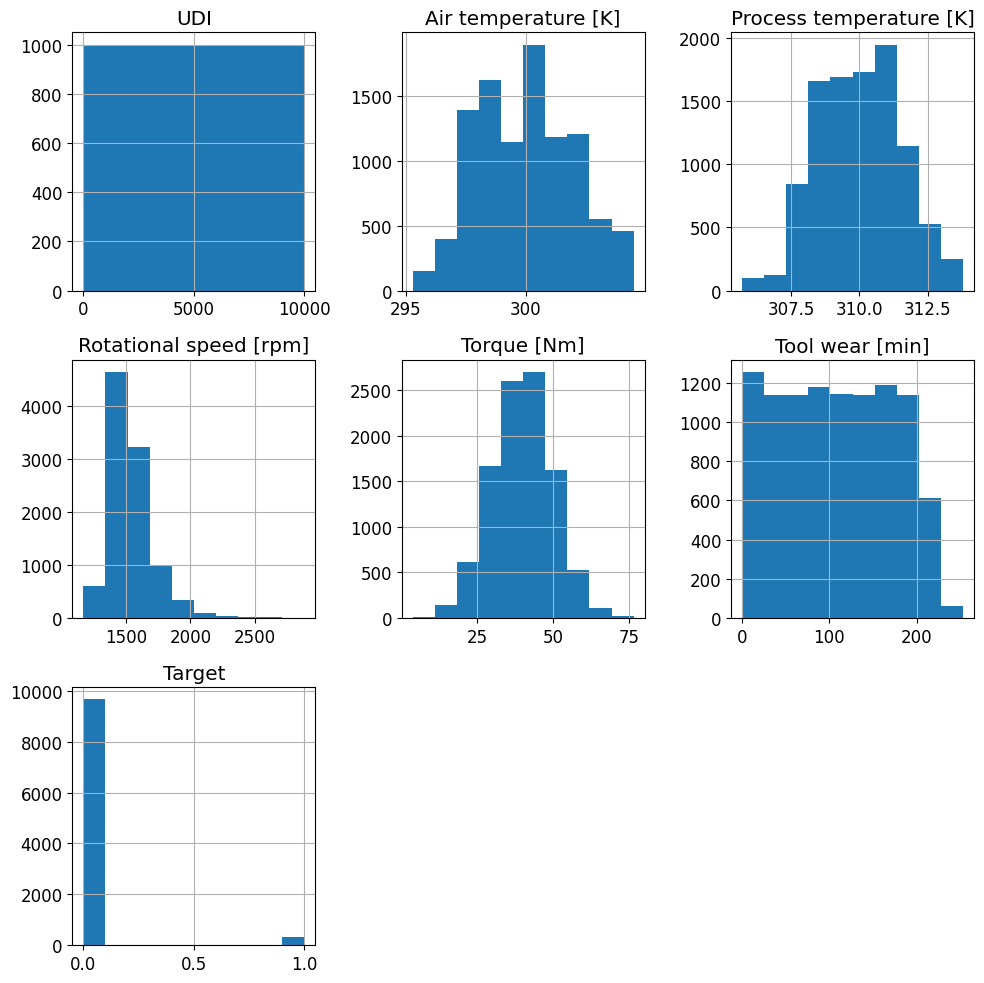

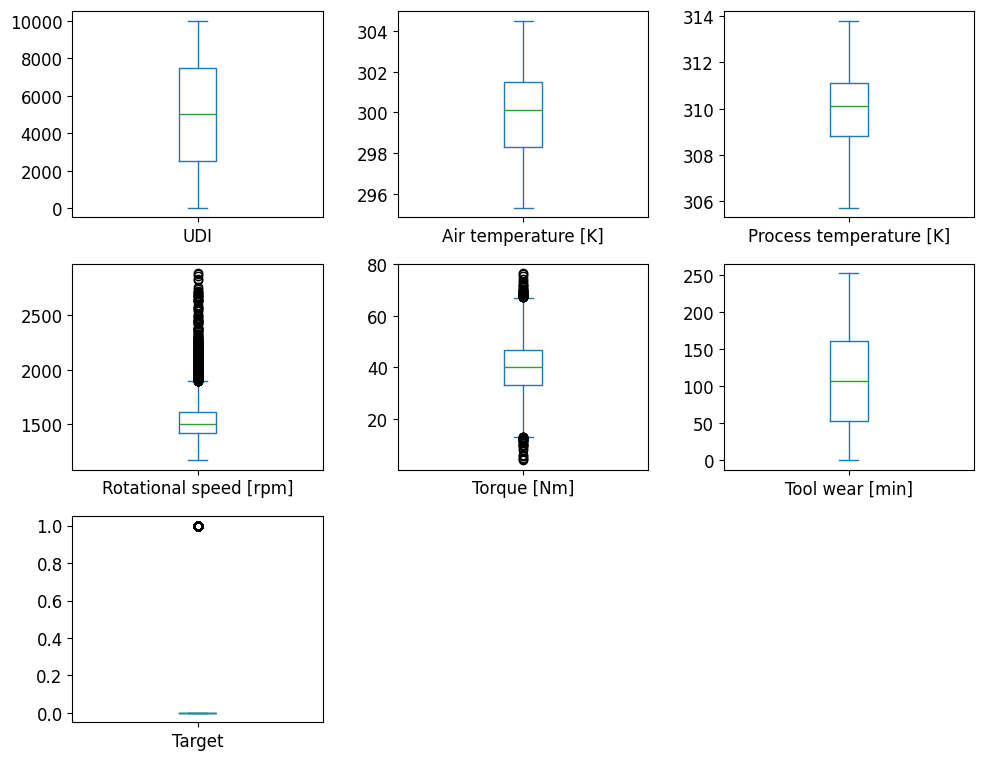

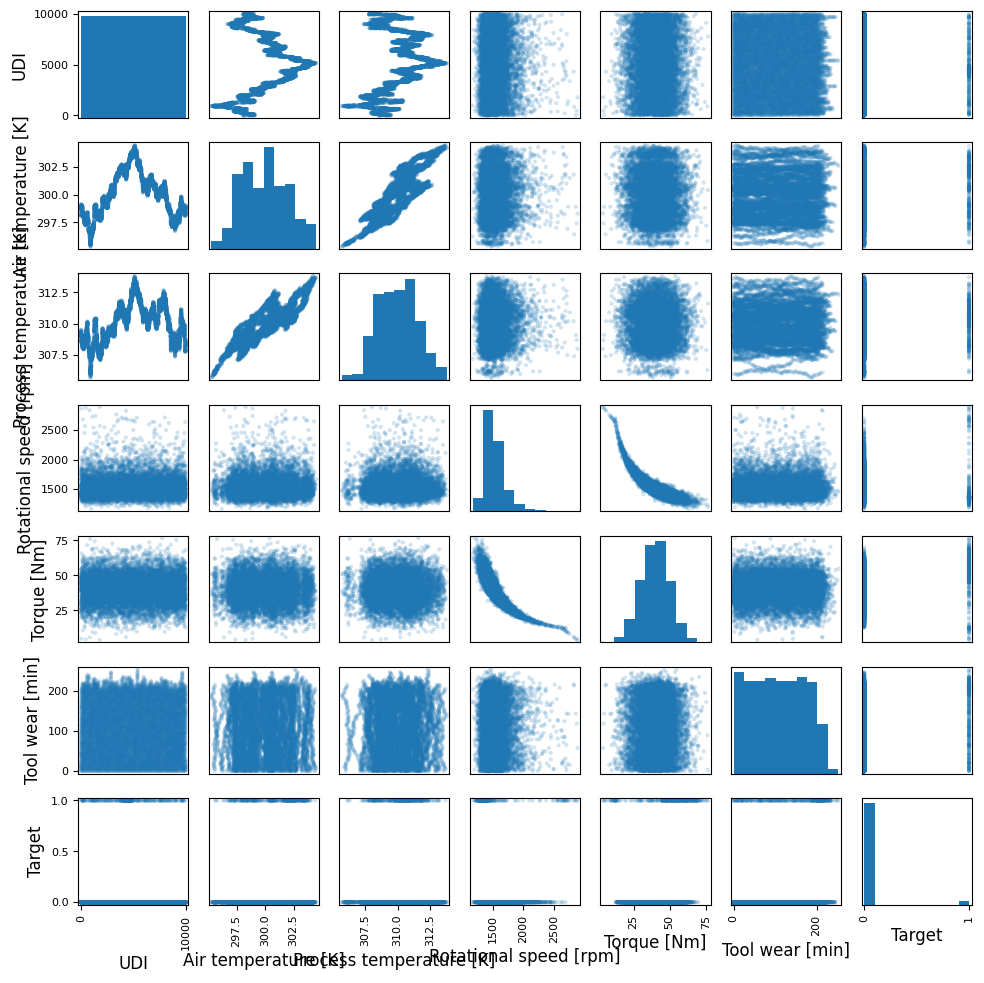

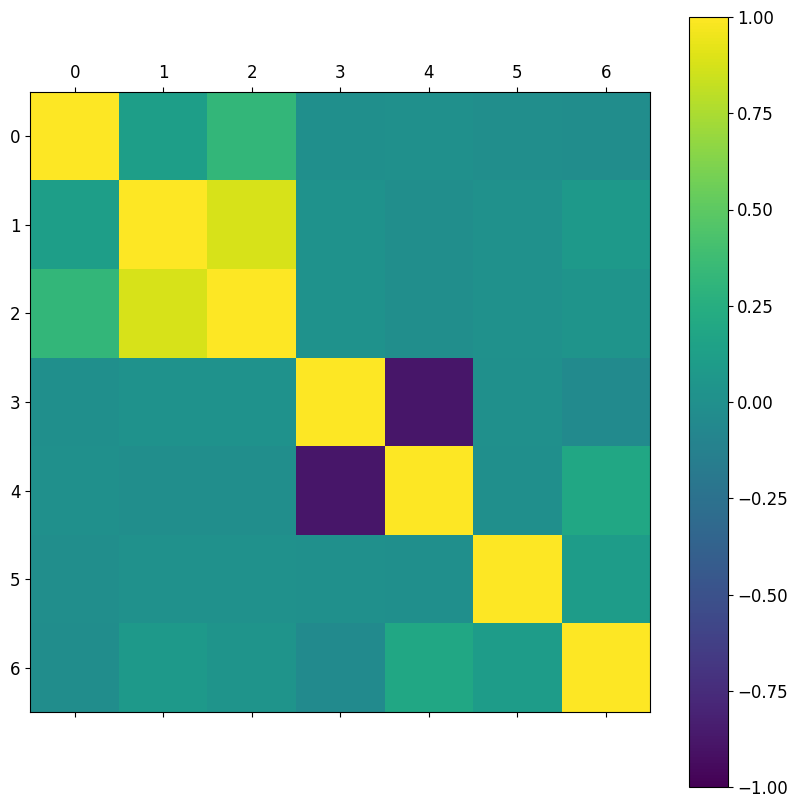

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('predictive_maintenance.csv')

# Convert 'M14860' column to numeric, coercing errors to NaN
# df['M14860'] = pd.to_numeric(df['M14860'], errors='coerce')

# Histograms for each feature
df.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)  # Add vertical gap between plots
plt.tight_layout()
plt.show()

# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)  # Add vertical gap between plots
plt.tight_layout()
plt.show()

# Scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # Add vertical gap between plots
plt.tight_layout()
plt.show()

# Correlation matrix
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()
